# 안녕하세요^^ 
## '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구 별 유동인구 데이터" 를 확인해 보도록 하겠습니다

In [1]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.2 seoul_moving_month_4.csv

[데이터 소개]
* 서울 시 구별 이동 2022년 4월 데이터

[변수 소개]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 'seoul_moving_month_4_step1.csv' 데이터를 확인하세요.
    * 아래에 'Pandas'를 Import하고 'seoul_moving_month_4_step1.csv'파일을 'seoul_moving'에 불러오고,  Shape을 확인하는 소스코드를 작성하고 실행해보세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요
        * index column은 0번 열 입니다

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd
import seaborn as sns

In [3]:
seoul_moving = pd.read_csv('1.2 seoul_moving_month_4.csv',sep=",", index_col = 0, encoding = 'UTF-8')

In [4]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_moving.shape

(28923054, 10)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95


In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,28923054.0,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07,2.892305e+07
mean,202204.0,1.365597e+01,1.712362e+04,1.719750e+04,4.279614e+01,3.279829e+01
std,0.0,5.849675e+00,9.046478e+03,9.063818e+03,1.777485e+01,2.584213e+01
min,202204.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+01
25%,202204.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,2.000000e+01
50%,202204.0,1.400000e+01,1.120000e+04,1.120000e+04,4.500000e+01,3.000000e+01
75%,202204.0,1.800000e+01,3.101400e+04,3.102100e+04,5.500000e+01,4.000000e+01
max,202204.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,7.700000e+02


In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.4+ GB


* 1번 열의 의미
    * " 2022년 1월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 H(야간상주지(집))으로 이동한 0 ~ 10세 여성은 총 27.52명이며 이들의 평균 이동시간은 10분이다

#### [실습문제3] 결측치 처리 ( NaN이 아닌 결측치를 처리 해봅시다)

* '인구이동(합)' column은 이동 인구의 합산인데 object 타입입니다. 

    - 왜 일까요? 

    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리)

    - 해당 값을 나름의 기준으로 변경하세요

    - '인구이동(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving.loc[seoul_moving['이동인구(합)'] == '*']

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
25,202204,일,0,11010,11010,F,25,HW,10,*
159,202204,일,0,11010,11010,M,40,HW,20,*
222,202204,일,0,11010,11020,F,20,HE,20,*
224,202204,일,0,11010,11020,F,20,EW,20,*
225,202204,일,0,11010,11020,F,20,WW,10,*
...,...,...,...,...,...,...,...,...,...,...
968425,202204,토,23,39000,11240,M,20,EW,60,*
968426,202204,토,23,39000,11240,M,20,EE,70,*
968439,202204,토,23,39000,11250,F,20,EE,80,*
968441,202204,토,23,39000,11250,F,30,EE,70,*


In [9]:
# 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체

# *를 결측치로 인식
seoul_moving = pd.read_csv('1.2 seoul_moving_month_4.csv',sep=",", index_col = 0, na_values='*', encoding = 'UTF-8')

In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving = seoul_moving.fillna(seoul_moving['이동인구(합)'].median())

In [11]:
# 잘 바꿨는지 확인
seoul_moving.loc[seoul_moving['이동인구(합)'] == '*']

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)


In [12]:
# 이동인구(합) column의 데이터 타입을 바꿔주세요
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.4+ GB


#### [실습문제4] 이동유형, 요일, 성별 변수의 value수를 파악

* 역시나 value_counts()를 활용해 봅시다.

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['이동유형'].value_counts()

이동유형
EH    5757073
HE    5520005
EE    5085099
WH    3108026
WE    2809148
HW    2695189
EW    2304535
WW    1026134
HH     617845
Name: count, dtype: int64

In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving['요일'].value_counts()

요일
토    4690806
금    4641881
목    4011291
수    3955646
화    3926876
월    3906272
일    3790282
Name: count, dtype: int64

* 4월의 요일 수를 알려드릴게요
    * 일 : 4, 월 : 4, 화 : 4, 수 : 4, 목 : 4, 금 : 5, 토 : 5

In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

seoul_moving['성별'].value_counts()

성별
M    16355029
F    12568025
Name: count, dtype: int64

#### [실습문제5] 어느 요일의 심야 이동이 가장 많을까요?

In [16]:
# 심야 이동시간 추출 (0~6시)
condition = (seoul_moving.도착시간 >= 0) & (seoul_moving.도착시간 <= 6)
seoul_moving_night = seoul_moving[condition]
seoul_moving_night

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95
...,...,...,...,...,...,...,...,...,...,...
748856,202204,토,6,39000,11040,M,50,EH,210,3.29
748857,202204,토,6,39000,11110,F,30,EH,360,8.09
748858,202204,토,6,39000,11140,F,45,EE,190,3.28
748859,202204,토,6,39000,11160,F,35,EE,350,3.05


#### [실습문제6] 서울 지역의 데이터만 골라 보도록 하겠습니다.

* 우리는 서울시의 데이터만 필요합니다!

* 출발과 도착이 모두 서울인 데이터만 추출해 주세요.

In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
is_seoul = (seoul_moving['출발 시군구 코드'] <= 11250 )& (seoul_moving['도착 시군구 코드'] <= 11250)

In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving_real = seoul_moving[is_seoul]
seoul_moving_real

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,11010,11010,F,0,EE,10,28.02
1,202204,일,0,11010,11010,F,0,EH,10,27.52
2,202204,일,0,11010,11010,F,0,HE,10,27.83
3,202204,일,0,11010,11010,F,10,HW,10,6.05
4,202204,일,0,11010,11010,F,10,EH,90,5.95
...,...,...,...,...,...,...,...,...,...,...
920410,202204,토,23,11250,11250,M,80,WH,10,85.10
920411,202204,토,23,11250,11250,M,80,EH,10,28.36
920412,202204,토,23,11250,11250,M,80,EE,20,37.99
920413,202204,토,23,11250,11250,M,80,HE,10,9.42


#### [실습문제7] 서울지역의 구 별로 groupby하여 데이터를 확인하겠습니다 (유동인구 기준)

* 유출이 제일 많은 구는?

* 유입이 제일 많은 구는?

* 유출이 제일 적은 구는?

* 유입이 제일 적은 구는?

* 참고자료 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

conv = {
    11010 : '종로구',
    11020 : '중구',
    11030 : '용산구',
    11040 : '성동구',
    11050 : '광진구',
    11060 : '동대문구',
    11070 : '중랑구',
    11080 : '성북구',
    11090 : '강북구',
    11100 : '도봉구',
    11110 : '노원구',
    11120 : '은평구',
    11130 : '서대문구',
    11140 : '마포구',
    11150 : '양천구',
    11160 : '강서구',
    11170 : '구로구',
    11180 : '금천구',
    11190 : '영등포구',
    11200 : '동작구',
    11210 : '관악구',
    11220 : '서초구',
    11230 : '강남구',
    11240 : '송파구',
    11250 : '강동구'
}

In [20]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving_real['출발 시군구 코드'] = seoul_moving_real['출발 시군구 코드'].map(conv)
seoul_moving_real['도착 시군구 코드'] = seoul_moving_real['도착 시군구 코드'].map(conv)
seoul_moving_real.head()

/var/folders/nb/vw8gj0_j4bl5c7lm4zvs8kyh0000gn/T/ipykernel_57627/3312822111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_moving_real['출발 시군구 코드'] = seoul_moving_real['출발 시군구 코드'].map(conv)
/var/folders/nb/vw8gj0_j4bl5c7lm4zvs8kyh0000gn/T/ipykernel_57627/3312822111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_moving_real['도착 시군구 코드'] = seoul_moving_real['도착 시군구 코드'].map(conv)


,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,종로구,종로구,F,0,EE,10,28.02
1,202204,일,0,종로구,종로구,F,0,EH,10,27.52
2,202204,일,0,종로구,종로구,F,0,HE,10,27.83
3,202204,일,0,종로구,종로구,F,10,HW,10,6.05
4,202204,일,0,종로구,종로구,F,10,EH,90,5.95


In [21]:
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid',
        font_scale = 1)

In [22]:
import matplotlib.pyplot as plt

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

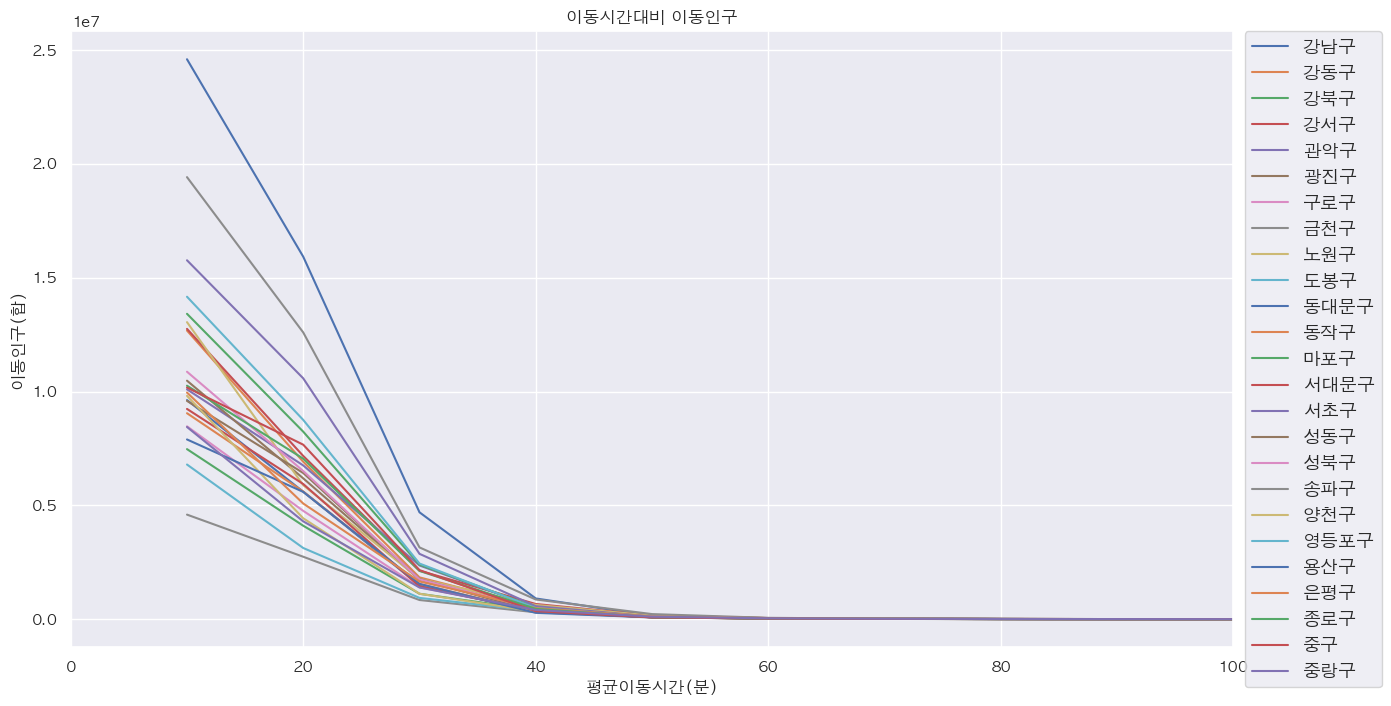

In [23]:
# 각 구에 대한 이동인구(합)을 구해서 시간대별로 정렬
grouped1 =seoul_moving_real.groupby(['도착 시군구 코드', '평균 이동 시간(분)'])['이동인구(합)'].sum().unstack().sort_index(axis=1)

plt.figure(figsize=(15,8))

for i in range(len(grouped1)):
    plt.plot(grouped1.iloc[i], label=grouped1.index[i])
    
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0,fontsize = 13)
plt.xlim(0, 100) # x축 범위 변경
plt.xlabel('평균이동시간(분)')
plt.ylabel('이동인구(합)')
plt.title('이동시간대비 이동인구')
plt.show()

In [24]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="AppleGothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

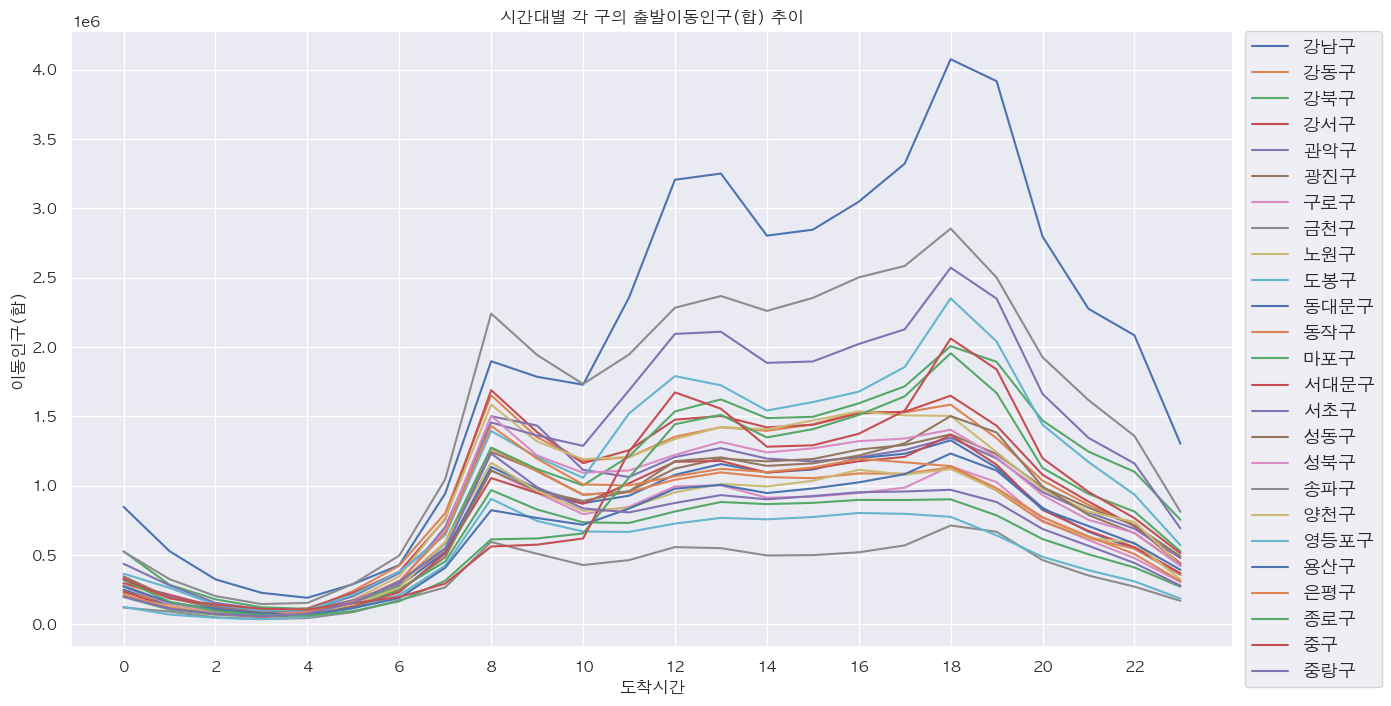

In [25]:
# 각 구에 대한 이동인구(합)을 구해서 시간대별로 정렬
grouped =seoul_moving_real.groupby(['출발 시군구 코드', '도착시간'])['이동인구(합)'].sum().unstack().sort_index(axis=1)

# 그래프 그리기
plt.figure(figsize=(15,8))

for i in range(len(grouped)):
    plt.plot(grouped.iloc[i], label=grouped.index[i])

plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0,fontsize = 13)
plt.xlabel('도착시간')
plt.ylabel('이동인구(합)')
plt.xticks(range(0, 24, 2))
plt.title('시간대별 각 구의 출발이동인구(합) 추이')
plt.show()

In [26]:
# 출발지역과 도착지역의 구별 이동유형 빈도수를 계산
seoul_moving_real['출발지역_이동유형'] = seoul_moving_real['이동유형'].str[0] # 출발지역 이동유형 추출
seoul_moving_real['도착지역_이동유형'] = seoul_moving_real['이동유형'].str[1] # 도착지역 이동유형 추출


/var/folders/nb/vw8gj0_j4bl5c7lm4zvs8kyh0000gn/T/ipykernel_57627/2685706342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_moving_real['출발지역_이동유형'] = seoul_moving_real['이동유형'].str[0] # 출발지역 이동유형 추출
/var/folders/nb/vw8gj0_j4bl5c7lm4zvs8kyh0000gn/T/ipykernel_57627/2685706342.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_moving_real['도착지역_이동유형'] = seoul_moving_real['이동유형'].str[1] # 도착지역 이동유형 추출


/var/folders/nb/vw8gj0_j4bl5c7lm4zvs8kyh0000gn/T/ipykernel_57627/3714696398.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(v, grouped4['E_ratio'][i]/2, f"{grouped4['E_ratio'][i]:.2f}")
/var/folders/nb/vw8gj0_j4bl5c7lm4zvs8kyh0000gn/T/ipykernel_57627/3714696398.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(v, grouped4['E_ratio'][i]+grouped4['W_ratio'][i]/2, f"{grouped4['W_ratio'][i]:.2f}")
/var/folders/nb/vw8gj0_j4bl5c7lm4zvs8kyh0000gn/T/ipykernel_57627/3714696398.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alw

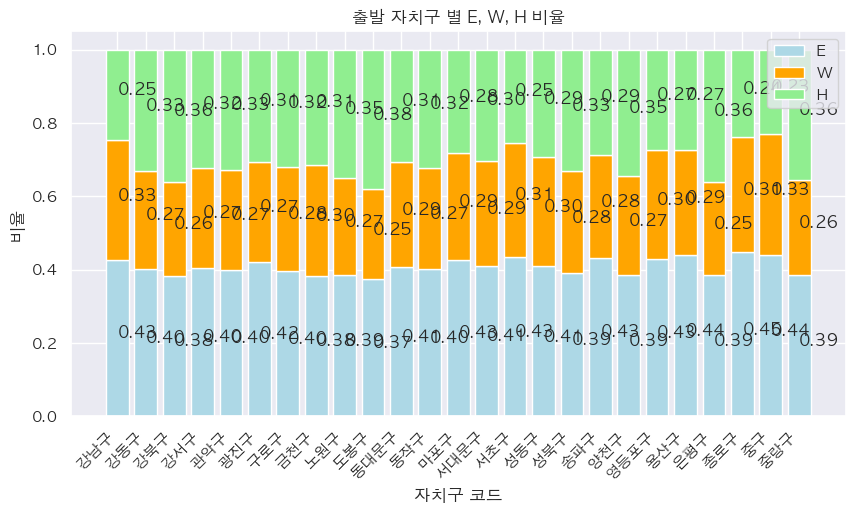

In [27]:
# 자치구 별 E, W, H의 비율 계산
grouped4 = seoul_moving_real.groupby(['출발 시군구 코드', '출발지역_이동유형']).size().reset_index(name='count')
grouped4 = pd.pivot_table(grouped4, values='count', index=['출발 시군구 코드'], columns=['출발지역_이동유형'], fill_value=0)

grouped4['E_ratio'] = grouped4['E'] / grouped4.sum(axis=1)
grouped4['W_ratio'] = grouped4['W'] / grouped4.sum(axis=1)
grouped4['H_ratio'] = grouped4['H'] / grouped4.sum(axis=1)

# 그래프 그리기
plt.figure(figsize=(10,5))
plt.bar(grouped4.index, grouped4['E_ratio'], color='lightblue', label='E')
plt.bar(grouped4.index, grouped4['W_ratio'], bottom=grouped4['E_ratio'], color='orange', label='W')
plt.bar(grouped4.index, grouped4['H_ratio'], bottom=grouped4['E_ratio']+grouped4['W_ratio'], color='lightgreen', label='H')
plt.title('출발 자치구 별 E, W, H 비율')

for i, v in enumerate(grouped4.index):
    plt.text(v, grouped4['E_ratio'][i]/2, f"{grouped4['E_ratio'][i]:.2f}")
    plt.text(v, grouped4['E_ratio'][i]+grouped4['W_ratio'][i]/2, f"{grouped4['W_ratio'][i]:.2f}")
    plt.text(v, grouped4['E_ratio'][i]+grouped4['W_ratio'][i]+grouped4['H_ratio'][i]/2, f"{grouped4['H_ratio'][i]:.2f}")

plt.xticks(rotation=45, ha='right')
plt.xlabel('자치구 코드')
plt.ylabel('비율')
plt.legend()
plt.show()

/var/folders/nb/vw8gj0_j4bl5c7lm4zvs8kyh0000gn/T/ipykernel_57627/3273663665.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(v, grouped4['E_ratio'][i]/2, f"{grouped4['E_ratio'][i]:.2f}")
/var/folders/nb/vw8gj0_j4bl5c7lm4zvs8kyh0000gn/T/ipykernel_57627/3273663665.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(v, grouped4['E_ratio'][i]+grouped4['W_ratio'][i]/2, f"{grouped4['W_ratio'][i]:.2f}")
/var/folders/nb/vw8gj0_j4bl5c7lm4zvs8kyh0000gn/T/ipykernel_57627/3273663665.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alw

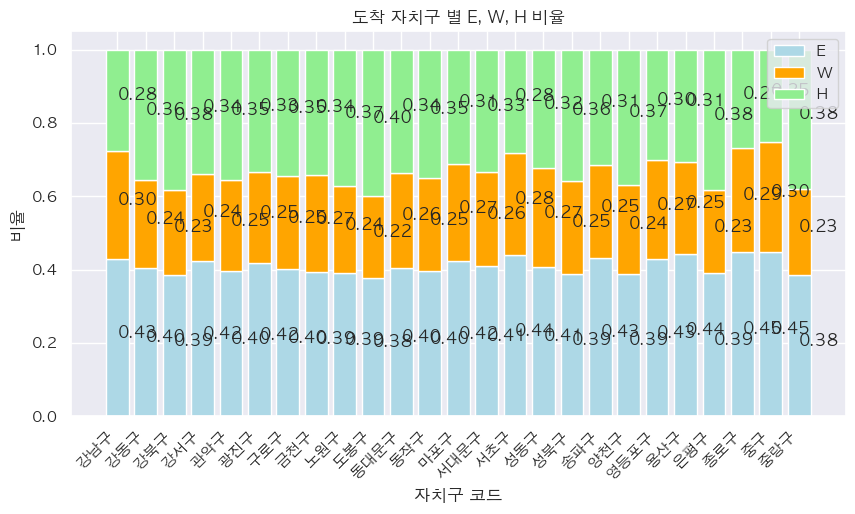

In [28]:
# 자치구 별 E, W, H의 비율 계산
grouped4 = seoul_moving_real.groupby(['도착 시군구 코드', '도착지역_이동유형']).size().reset_index(name='count')
grouped4 = pd.pivot_table(grouped4, values='count', index=['도착 시군구 코드'], columns=['도착지역_이동유형'], fill_value=0)

grouped4['E_ratio'] = grouped4['E'] / grouped4.sum(axis=1)
grouped4['W_ratio'] = grouped4['W'] / grouped4.sum(axis=1)
grouped4['H_ratio'] = grouped4['H'] / grouped4.sum(axis=1)

# 그래프 그리기
plt.figure(figsize=(10,5))
plt.bar(grouped4.index, grouped4['E_ratio'], color='lightblue', label='E')
plt.bar(grouped4.index, grouped4['W_ratio'], bottom=grouped4['E_ratio'], color='orange', label='W')
plt.bar(grouped4.index, grouped4['H_ratio'], bottom=grouped4['E_ratio']+grouped4['W_ratio'], color='lightgreen', label='H')
plt.title('도착 자치구 별 E, W, H 비율')

for i, v in enumerate(grouped4.index):
    plt.text(v, grouped4['E_ratio'][i]/2, f"{grouped4['E_ratio'][i]:.2f}")
    plt.text(v, grouped4['E_ratio'][i]+grouped4['W_ratio'][i]/2, f"{grouped4['W_ratio'][i]:.2f}")
    plt.text(v, grouped4['E_ratio'][i]+grouped4['W_ratio'][i]+grouped4['H_ratio'][i]/2, f"{grouped4['H_ratio'][i]:.2f}")

plt.xticks(rotation=45, ha='right')
plt.xlabel('자치구 코드')
plt.ylabel('비율')
plt.legend()
plt.show()

In [29]:
grouped4

도착지역_이동유형,E,H,W,E_ratio,W_ratio,H_ratio
도착 시군구 코드,,,,,,
강남구,237387.0,153315.0,163501.0,0.428339,0.295020,0.276640
강동구,148426.0,131110.0,88045.0,0.403791,0.239525,0.356683
강북구,139216.0,137828.0,83923.0,0.385675,0.232495,0.381829
강서구,178268.0,142366.0,99760.0,0.424050,0.237301,0.338648
관악구,167330.0,150184.0,105753.0,0.395330,0.249849,0.354820
광진구,178580.0,143076.0,106885.0,0.416716,0.249416,0.333867
구로구,154952.0,133586.0,97842.0,0.401035,0.253227,0.345737
금천구,115565.0,100981.0,78203.0,0.392079,0.265320,0.342599
노원구,162999.0,156172.0,99491.0,0.389333,0.237640,0.373026


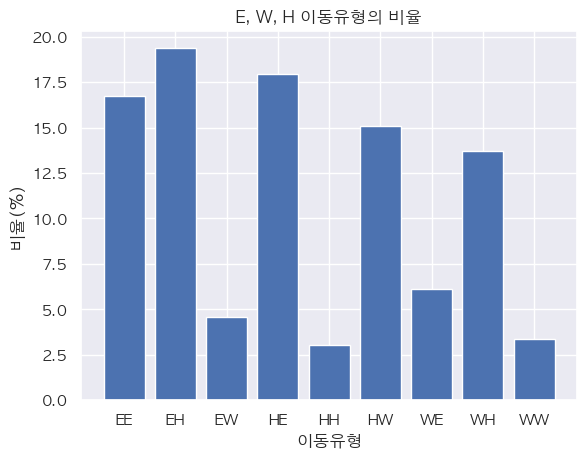

In [30]:
# 이동유형별 전체 이동인구 계산
total_counts = seoul_moving_real.groupby('이동유형')['이동인구(합)'].sum()

# 이동유형별 비율 계산
type_ratios = total_counts / total_counts.sum() *100

# 그래프 그리기
plt.bar(type_ratios.index, type_ratios.values)
plt.title('E, W, H 이동유형의 비율')
plt.xlabel('이동유형')
plt.ylabel('비율(%)')
plt.show()

#### [실습문제8] 낮시간만 볼게요 심야버스 제외하겠습니다

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [31]:
seoul_moving_real

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),출발지역_이동유형,도착지역_이동유형
0,202204,일,0,종로구,종로구,F,0,EE,10,28.02,E,E
1,202204,일,0,종로구,종로구,F,0,EH,10,27.52,E,H
2,202204,일,0,종로구,종로구,F,0,HE,10,27.83,H,E
3,202204,일,0,종로구,종로구,F,10,HW,10,6.05,H,W
4,202204,일,0,종로구,종로구,F,10,EH,90,5.95,E,H
...,...,...,...,...,...,...,...,...,...,...,...,...
920410,202204,토,23,강동구,강동구,M,80,WH,10,85.10,W,H
920411,202204,토,23,강동구,강동구,M,80,EH,10,28.36,E,H
920412,202204,토,23,강동구,강동구,M,80,EE,20,37.99,E,E
920413,202204,토,23,강동구,강동구,M,80,HE,10,9.42,H,E


In [32]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving_real = seoul_moving_real.drop(index= (seoul_moving_real[seoul_moving_real['도착시간']<=4]).index)

In [33]:
seoul_moving_real

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),출발지역_이동유형,도착지역_이동유형
14654,202204,일,5,노원구,성북구,F,65,EW,10,4.68,E,W
14655,202204,일,5,노원구,성북구,F,65,WH,10,9.44,W,H
14656,202204,일,5,노원구,성북구,F,70,HW,10,5.69,H,W
14657,202204,일,5,노원구,성북구,F,70,HE,10,5.68,H,E
14658,202204,일,5,노원구,성북구,F,70,EH,20,5.73,E,H
...,...,...,...,...,...,...,...,...,...,...,...,...
920410,202204,토,23,강동구,강동구,M,80,WH,10,85.10,W,H
920411,202204,토,23,강동구,강동구,M,80,EH,10,28.36,E,H
920412,202204,토,23,강동구,강동구,M,80,EE,20,37.99,E,E
920413,202204,토,23,강동구,강동구,M,80,HE,10,9.42,H,E


#### [실습문제9] '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균 과 합을 구해보겠습니다

* groupby 사용, as_index=False로 설정해주세요

In [34]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
tmp1 = seoul_moving_real.groupby('도착 시군구 코드', as_index=False) ['평균 이동 시간(분)'].sum()
tmp1 = tmp1.rename(columns={'평균 이동 시간(분)':'평균 이동 시간(분) 합'})
tmp2 = seoul_moving_real.groupby('도착 시군구 코드',as_index=False) ['평균 이동 시간(분)'].mean()
tmp2 = tmp2.rename(columns={'평균 이동 시간(분)':'평균 이동 시간(분) 평균'})

In [35]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
tmp3 = seoul_moving_real.groupby('도착 시군구 코드',as_index=False) ['이동인구(합)'].sum()
tmp3 = tmp3.rename(columns={'이동인구(합)':'이동인구(합) 합'})
tmp4 = seoul_moving_real.groupby('도착 시군구 코드',as_index=False) ['이동인구(합)'].mean()
tmp4 = tmp4.rename(columns={'이동인구(합)':'이동인구(합) 평균'})

In [40]:
# 파일을 합쳐볼까요
tmp5 = pd.concat([tmp1,tmp2,tmp3,tmp4],axis=1)
tmp5 = tmp5.loc[:, ~tmp5.T.duplicated()]
tmp5.rename(columns={'도착 시군구 코드': '자치구'}, inplace=True)

tmp5

,자치구,평균 이동 시간(분) 합,평균 이동 시간(분) 평균,이동인구(합) 합,이동인구(합) 평균
0,강남구,6543820,23.418794,29265839.75,104.735564
1,강동구,5082380,25.931701,14506105.05,74.014139
2,강북구,4458260,24.355289,7829601.03,42.772785
3,강서구,5486630,25.520396,14110253.22,65.632137
4,관악구,5150450,23.480725,11733292.01,53.491675
5,광진구,5020720,22.810568,11111665.75,50.483477
6,구로구,4717560,23.162536,9265357.04,45.491560
7,금천구,3789660,24.283819,5219722.51,33.447538
8,노원구,5235480,24.662041,12636671.68,59.525796
9,도봉구,4086140,25.138206,6630981.35,40.794240


In [41]:
# 해당 데이터프레임을 'df_seoul_moving.csv' 파일로 저장하세요
fpath = './df_seoul_moving.csv'
tmp5.to_csv(fpath, index=False, encoding='utf-8-sig')

---